# Concrete Compressive Strength

<img src="https://blog.koctas.com.tr/wp-content/uploads/2023/08/beton-siniflari-nelerdir.jpg" alt="Beton sınıfları" width="600">

Concrete Compressive Strength Veri Kümesi

- Veri Tipi: Çok değişkenli (multivariate)
- Amaç: Betonun bileşenleri (Çimento, Cüruf, Uçucu Kül, Su, Süperakışkanlaştırıcı, İri ve İnce Agrega) 
ve Yaş (gün) kullanılarak basınç dayanımının (MPa) tahmin edilmesi.
- Gözlem Sayısı: 1030
- Öznitelik Sayısı: 9 (8 girdi, 1 çıktı)
- Eksik Değer: Yok

Değişkenler:
1. Cement (kg/m³)  
2. Blast Furnace Slag (kg/m³)  
3. Fly Ash (kg/m³)  
4. Water (kg/m³)  
5. Superplasticizer (kg/m³)  
6. Coarse Aggregate (kg/m³)  
7. Fine Aggregate (kg/m³)  
8. Age (gün, 1–365)  
9. Strength (MPa, çıktı değişkeni)

Kaynak:
Prof. I-Cheng Yeh, Chung-Hua University, Taiwan  
Makale: “Modeling of strength of high performance concrete using artificial neural networks”, Cement and Concrete Research, Vol. 28, No. 12, 1998.

In [1]:
import pandas as pd

In [2]:
df = pd.read_excel('Concrete_Data.xls')

In [3]:
# EDA - Exploratory Data Anaylysis - Keşifçi veri analizi

In [4]:
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [5]:
df.columns = ['Cement', 'Slag', 'FlyAsh', 'Water', 'Plasticizer',
              'CoarseAgg', 'FineAgg', 'Age', 'Strength']

In [6]:
df.tail()

,Cement,Slag,FlyAsh,Water,Plasticizer,CoarseAgg,FineAgg,Age,Strength
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036
1029,260.9,100.5,78.3,200.6,8.6,864.5,761.5,28,32.401235


In [7]:
df.shape

(1030, 9)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Cement       1030 non-null   float64
 1   Slag         1030 non-null   float64
 2   FlyAsh       1030 non-null   float64
 3   Water        1030 non-null   float64
 4   Plasticizer  1030 non-null   float64
 5   CoarseAgg    1030 non-null   float64
 6   FineAgg      1030 non-null   float64
 7   Age          1030 non-null   int64  
 8   Strength     1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [9]:
df.isnull().sum()

Cement         0
Slag           0
FlyAsh         0
Water          0
Plasticizer    0
CoarseAgg      0
FineAgg        0
Age            0
Strength       0
dtype: int64

In [10]:
df.describe()

,Cement,Slag,FlyAsh,Water,Plasticizer,CoarseAgg,FineAgg,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [11]:
df.sample()

,Cement,Slag,FlyAsh,Water,Plasticizer,CoarseAgg,FineAgg,Age,Strength
572,220.8,147.2,0.0,185.7,0.0,1055.0,744.3,7,13.089012


In [12]:
df.corr(numeric_only=True)

,Cement,Slag,FlyAsh,Water,Plasticizer,CoarseAgg,FineAgg,Age,Strength
Cement,1.000000,-0.275193,-0.397475,-0.081544,0.092771,-0.109356,-0.222720,0.081947,0.497833
Slag,-0.275193,1.000000,-0.323569,0.107286,0.043376,-0.283998,-0.281593,-0.044246,0.134824
FlyAsh,-0.397475,-0.323569,1.000000,-0.257044,0.377340,-0.009977,0.079076,-0.154370,-0.105753
Water,-0.081544,0.107286,-0.257044,1.000000,-0.657464,-0.182312,-0.450635,0.277604,-0.289613
Plasticizer,0.092771,0.043376,0.377340,-0.657464,1.000000,-0.266303,0.222501,-0.192717,0.366102
CoarseAgg,-0.109356,-0.283998,-0.009977,-0.182312,-0.266303,1.000000,-0.178506,-0.003016,-0.164928
FineAgg,-0.222720,-0.281593,0.079076,-0.450635,0.222501,-0.178506,1.000000,-0.156094,-0.167249
Age,0.081947,-0.044246,-0.154370,0.277604,-0.192717,-0.003016,-0.156094,1.000000,0.328877
Strength,0.497833,0.134824,-0.105753,-0.289613,0.366102,-0.164928,-0.167249,0.328877,1.000000


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

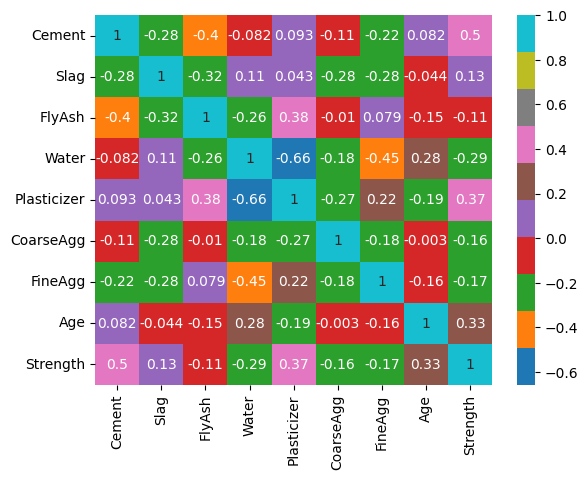

In [14]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='tab10') #cmap rengini değiştiriyor

In [15]:
df['Strength'].value_counts()

Strength
33.398217    5
31.350474    4
35.301171    4
71.298713    4
77.297154    4
            ..
44.284354    1
31.178794    1
23.696601    1
32.768036    1
27.681082    1
Name: count, Length: 938, dtype: int64

In [16]:
df['Strength'].value_counts(normalize=True)

Strength
33.398217    0.004854
31.350474    0.003883
35.301171    0.003883
71.298713    0.003883
77.297154    0.003883
               ...   
44.284354    0.000971
31.178794    0.000971
23.696601    0.000971
32.768036    0.000971
27.681082    0.000971
Name: proportion, Length: 938, dtype: float64

<Axes: xlabel='Strength', ylabel='count'>

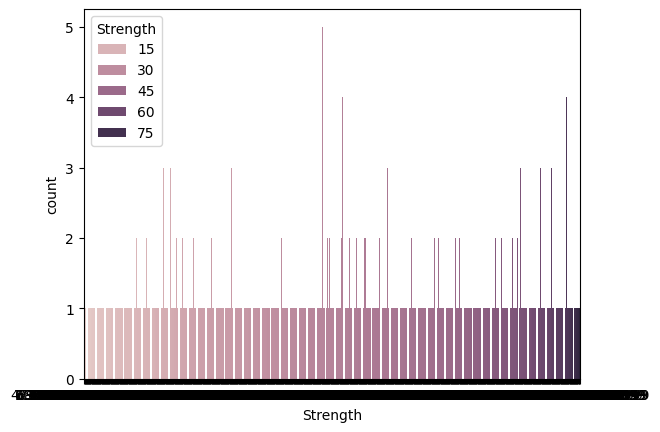

In [17]:
sns.countplot(x=df['Strength'], hue=df['Strength'])

<Axes: xlabel='Age', ylabel='count'>

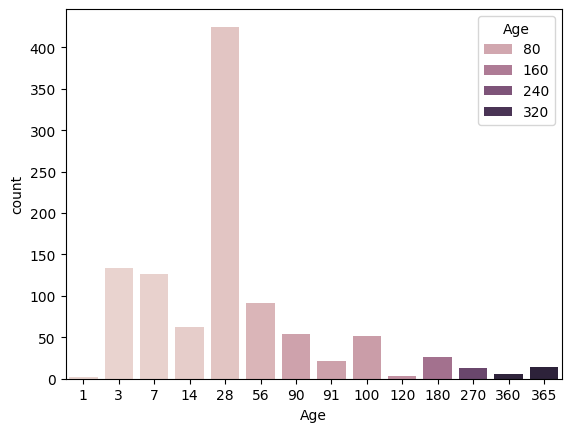

In [18]:
sns.countplot(x=df['Age'], hue=df['Age'])

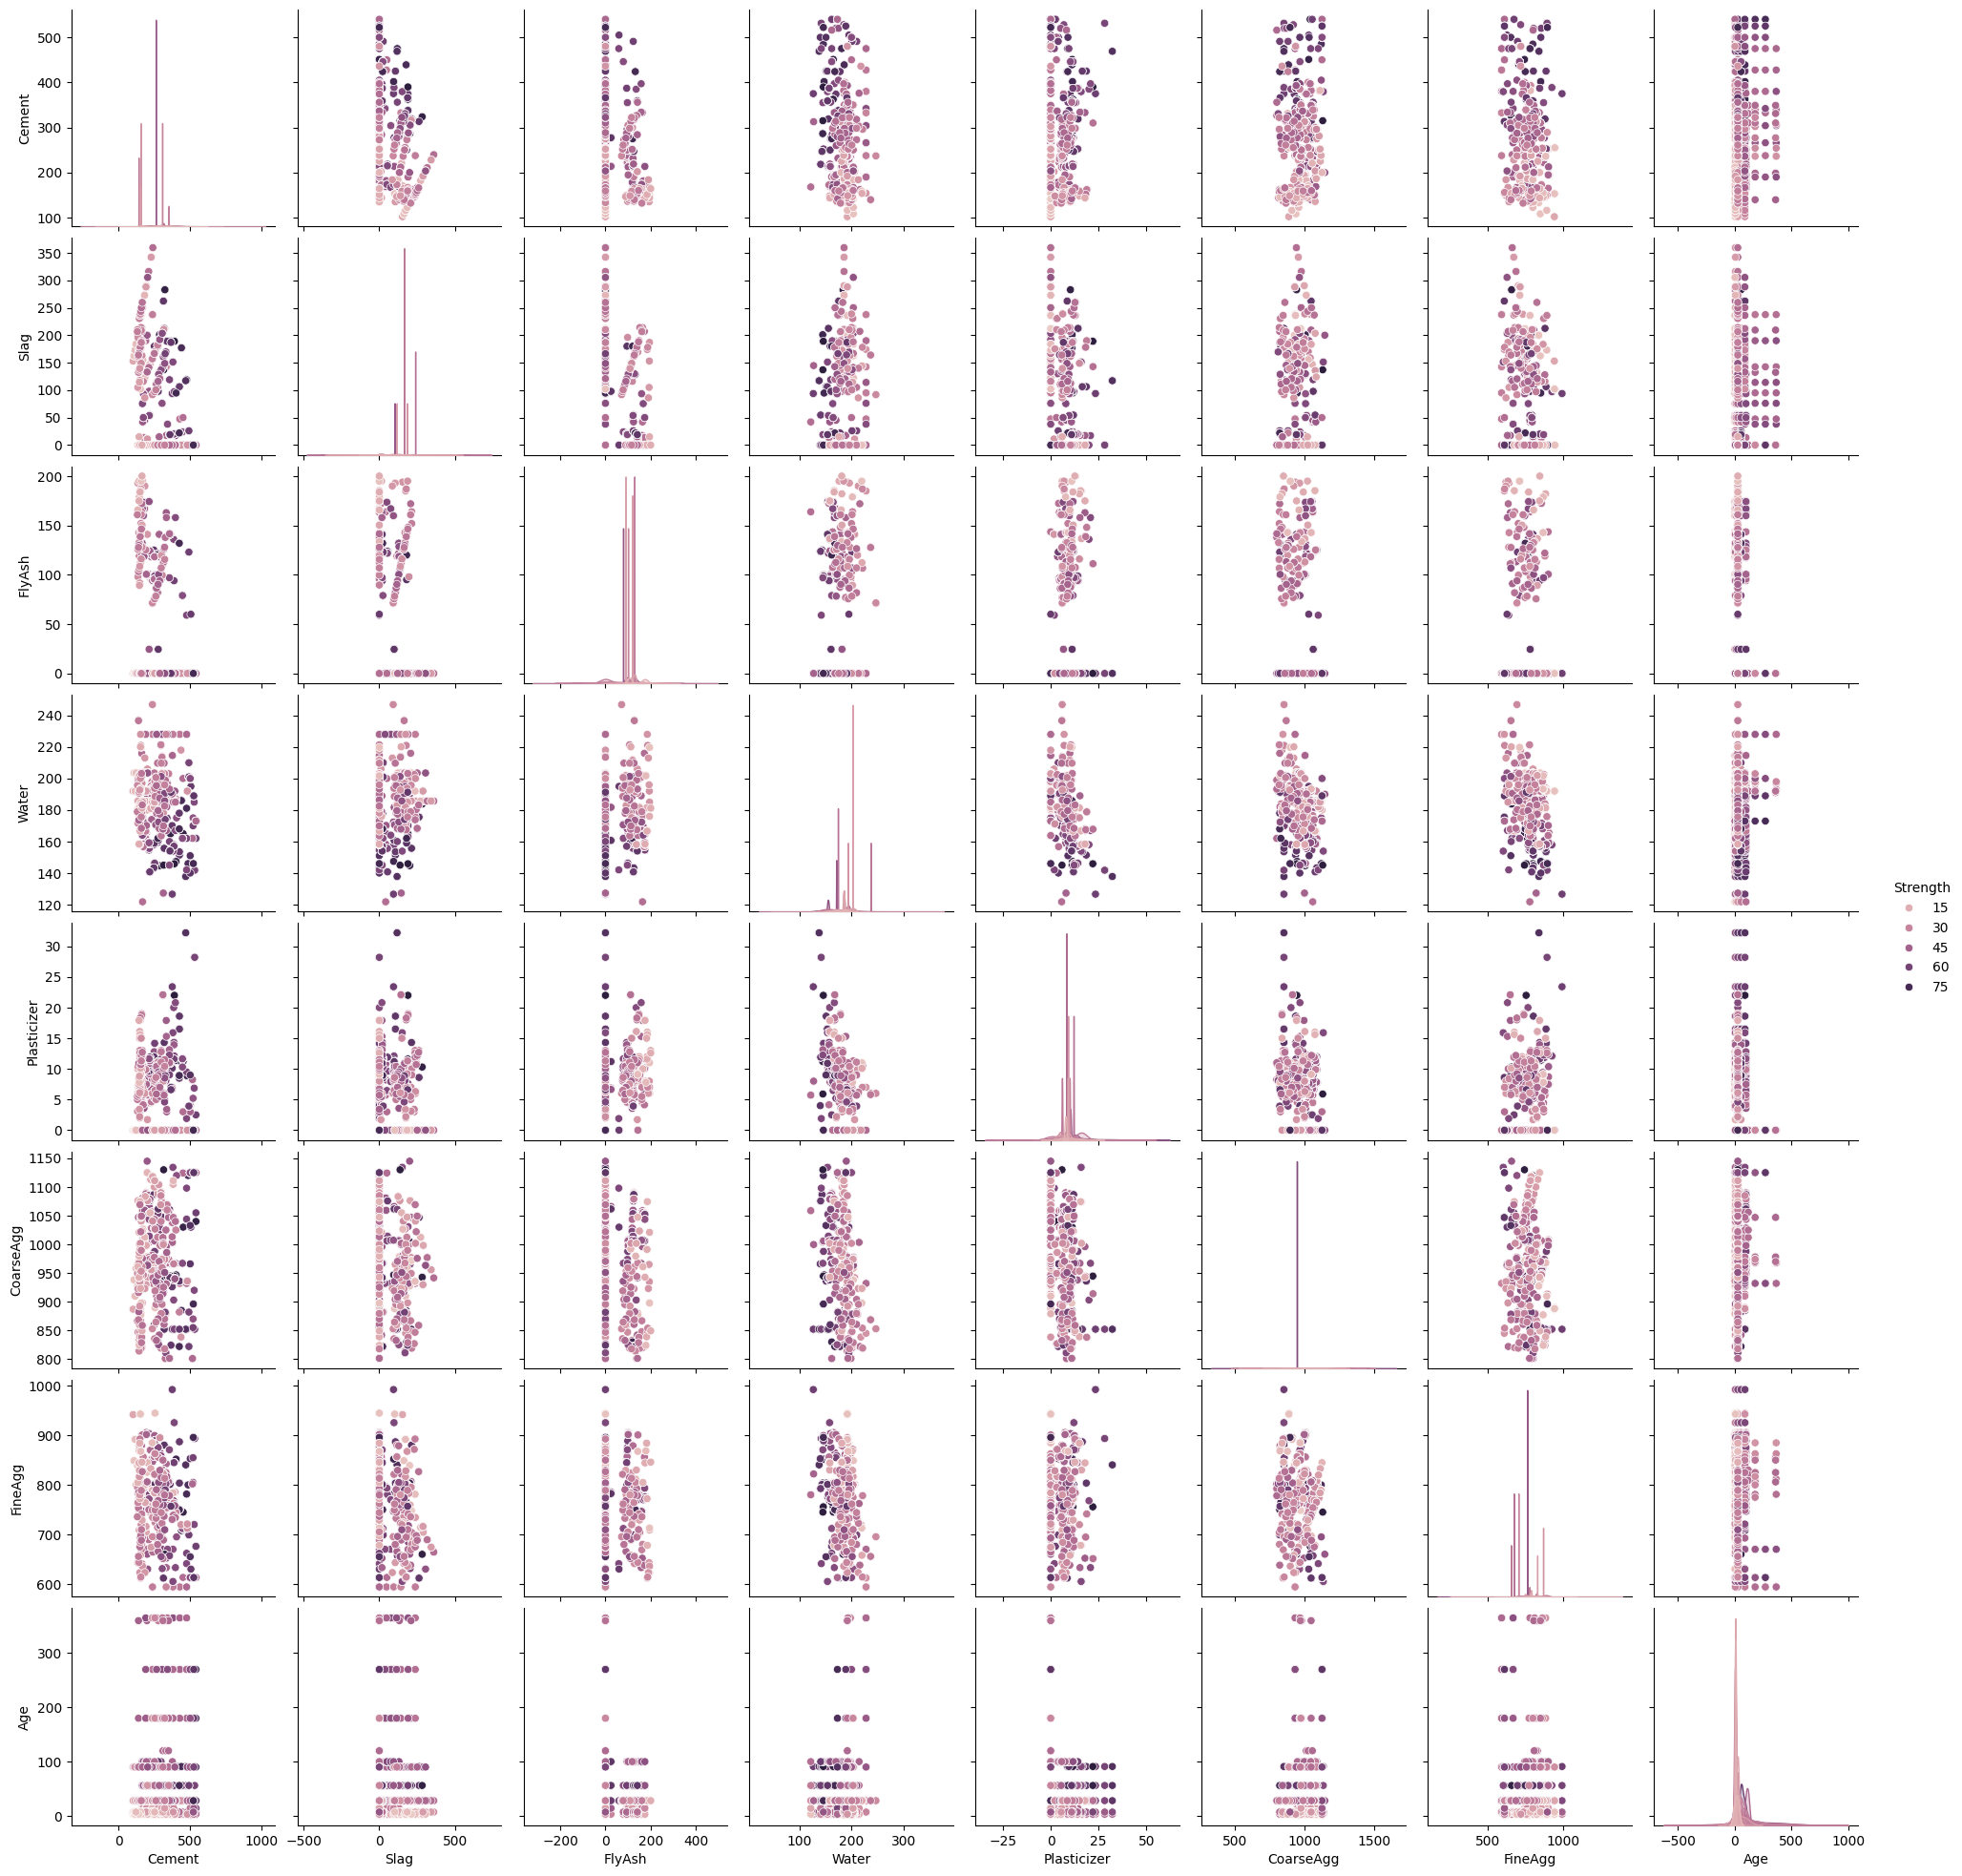

In [19]:
sns.pairplot(df, hue='Strength')  # her sütunun diğer her sütuna göre değişimi
plt.savefig('figure.png', dpi=300)

In [20]:
df.corr(numeric_only=True)

,Cement,Slag,FlyAsh,Water,Plasticizer,CoarseAgg,FineAgg,Age,Strength
Cement,1.000000,-0.275193,-0.397475,-0.081544,0.092771,-0.109356,-0.222720,0.081947,0.497833
Slag,-0.275193,1.000000,-0.323569,0.107286,0.043376,-0.283998,-0.281593,-0.044246,0.134824
FlyAsh,-0.397475,-0.323569,1.000000,-0.257044,0.377340,-0.009977,0.079076,-0.154370,-0.105753
Water,-0.081544,0.107286,-0.257044,1.000000,-0.657464,-0.182312,-0.450635,0.277604,-0.289613
Plasticizer,0.092771,0.043376,0.377340,-0.657464,1.000000,-0.266303,0.222501,-0.192717,0.366102
CoarseAgg,-0.109356,-0.283998,-0.009977,-0.182312,-0.266303,1.000000,-0.178506,-0.003016,-0.164928
FineAgg,-0.222720,-0.281593,0.079076,-0.450635,0.222501,-0.178506,1.000000,-0.156094,-0.167249
Age,0.081947,-0.044246,-0.154370,0.277604,-0.192717,-0.003016,-0.156094,1.000000,0.328877
Strength,0.497833,0.134824,-0.105753,-0.289613,0.366102,-0.164928,-0.167249,0.328877,1.000000


In [21]:
abs(df.corr(numeric_only=True)['Strength']).sort_values(ascending=False)

Strength       1.000000
Cement         0.497833
Plasticizer    0.366102
Age            0.328877
Water          0.289613
FineAgg        0.167249
CoarseAgg      0.164928
Slag           0.134824
FlyAsh         0.105753
Name: Strength, dtype: float64

In [22]:
x = df[['Cement','Plasticizer','Age','Water']]

In [23]:
y = df[['Strength']]

In [24]:
from sklearn.model_selection import train_test_split  # datayı ikiye bölüyor

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42) 

In [26]:
from sklearn.linear_model import LinearRegression  # makine öğrenmesi (linear model)

In [27]:
lr = LinearRegression()

In [28]:
model = lr.fit(x_train, y_train)

In [29]:
tahminlr = model.predict(x_test)

In [30]:
tahminlr

array([[58.07385572],
       [43.63298991],
       [58.45668829],
       [43.20355619],
       [23.63384141],
       [36.06390381],
       [23.51514881],
       [49.33839718],
       [35.67562472],
       [41.78504001],
       [37.99884426],
       [18.90236685],
       [70.17850603],
       [37.50357053],
       [27.77122052],
       [22.7395329 ],
       [32.49251773],
       [21.8479844 ],
       [31.87285222],
       [27.107908  ],
       [27.97335007],
       [31.44621676],
       [41.40256778],
       [15.87228292],
       [34.22127844],
       [40.1919668 ],
       [23.16525709],
       [37.99884426],
       [44.50626026],
       [28.18860937],
       [38.18831242],
       [35.12881729],
       [27.65309025],
       [49.10026484],
       [25.80065115],
       [26.31644819],
       [34.36327195],
       [36.7981929 ],
       [15.58376728],
       [41.57945913],
       [27.75382482],
       [14.02379936],
       [28.85704901],
       [50.71253692],
       [24.80364171],
       [47

In [31]:
from sklearn.metrics import r2_score, mean_squared_error

In [32]:
mean_squared_error(y_test, tahminlr) ** 0.5  

10.694449938192665

In [33]:
r2_score(y_test, tahminlr)  

0.5561519072797714

In [34]:
x = df[['Cement','Plasticizer','Age','Water','FineAgg','CoarseAgg','Slag','FlyAsh']]

In [35]:
y = df[['Strength']]

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [37]:
model = lr.fit(x_train, y_train)

In [38]:
tahminlr = model.predict(x_test)

In [39]:
mean_squared_error(y_test, tahminlr) ** 0.5

9.796707832398447

In [40]:
r2_score(y_test, tahminlr)

0.627541605542902

In [41]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet  

In [42]:
R = Ridge()
L = Lasso()
E = ElasticNet()

In [43]:
Rmodel = R.fit(x_train, y_train)

In [44]:
tahminR = Rmodel.predict(x_test)

In [45]:
r2_score(y_test, tahminR)

0.6275417727142354

In [46]:
mean_squared_error(y_test, tahminR) ** 0.5

9.796705633859066

In [47]:
L.fit(x_train, y_train)

Lasso()

In [48]:
tahminL = L.predict(x_test)

In [49]:
r2_score(y_test, tahminL)

0.6275772932837811

In [50]:
E.fit(x_train, y_train)

ElasticNet()

In [51]:
tahminE = E.predict(x_test)

In [52]:
r2_score(y_test, tahminE)

0.6276324626846195

In [53]:
lr.coef_

array([[ 0.11897516,  0.30873202,  0.11644448, -0.13571192,  0.02406104,
         0.01780436,  0.10851781,  0.08216854]])

In [54]:
feature_importance = pd.DataFrame({'Feature': x_train.columns, 'Coefs': lr.coef_[0]})

In [55]:
feature_importance

,Feature,Coefs
0,Cement,0.118975
1,Plasticizer,0.308732
2,Age,0.116444
3,Water,-0.135712
4,FineAgg,0.024061
5,CoarseAgg,0.017804
6,Slag,0.108518
7,FlyAsh,0.082169


<BarContainer object of 8 artists>

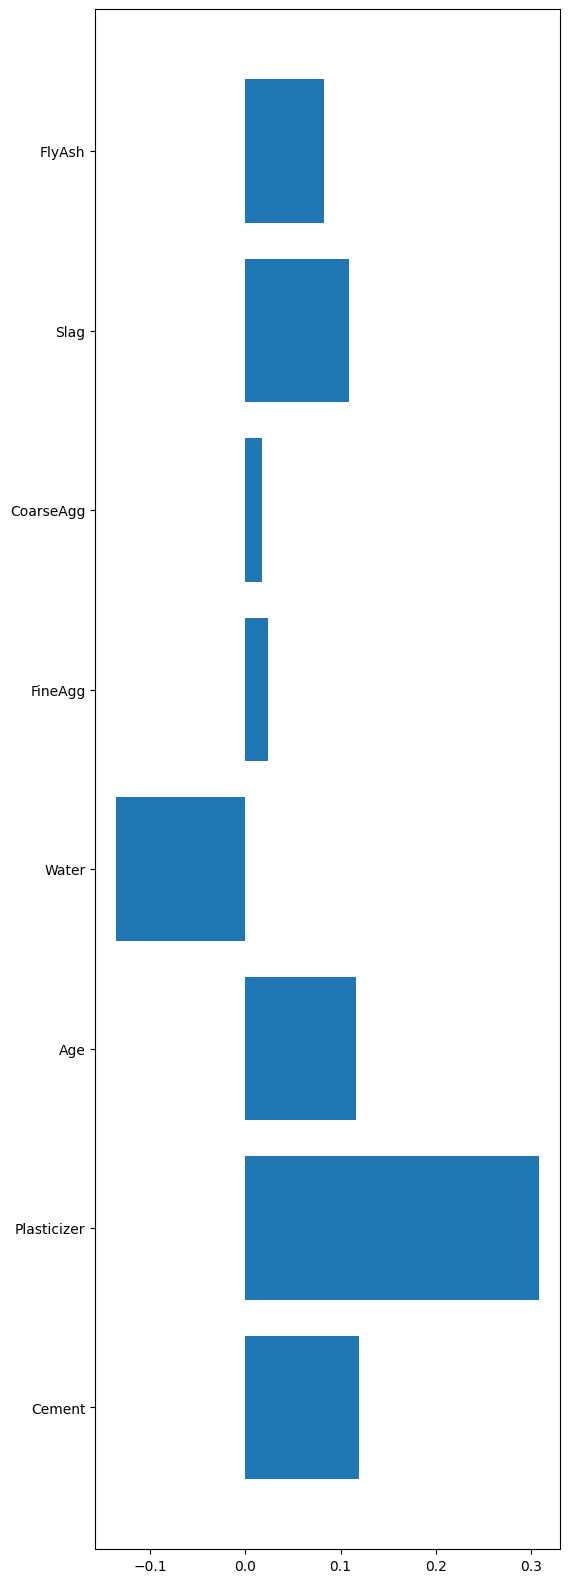

In [56]:
plt.figure(figsize=(6,20))
plt.barh(feature_importance['Feature'], feature_importance['Coefs'])

In [58]:
residuals = y_test - tahminlr

In [59]:
residuals  # gerçek değerler ile tahmin edilen değerler arasındaki fark

,Strength
31,-6.748843
109,3.858676
136,10.978042
88,-16.270195
918,-6.684967
...,...
482,0.143625
545,1.259474
110,-11.090572
514,20.165398


<Axes: xlabel='Strength', ylabel='Density'>

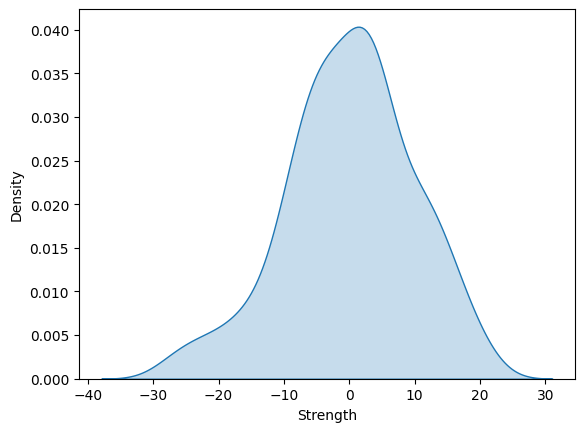

In [60]:
sns.kdeplot(x=residuals['Strength'], fill=True)

In [61]:
#pip install yellowbrick

In [62]:
from yellowbrick.regressor import ResidualsPlot

C:\Users\leyuz\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


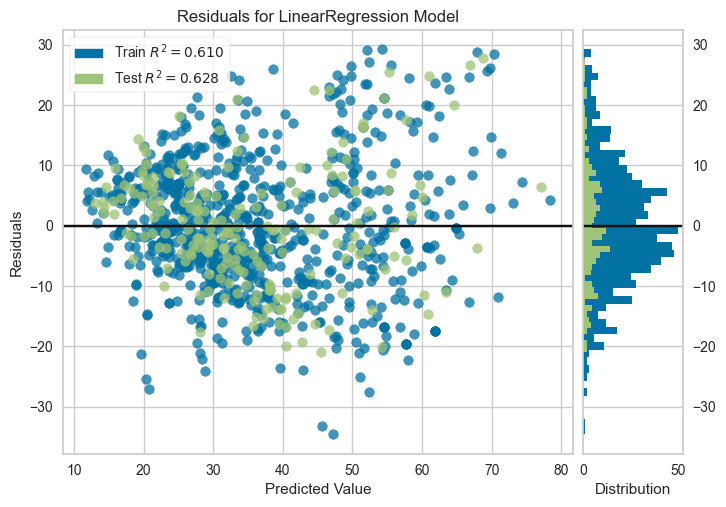

In [63]:
vis = ResidualsPlot(lr)
vis.fit(x_train, y_train)
vis.score(x_test, y_test)
vis.show()
plt.show()

In [64]:
from sklearn.dummy import DummyRegressor
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [65]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [66]:
base = DummyRegressor(strategy="mean")
base.fit(x_train, y_train)
pred_base = base.predict(x_test)

In [67]:
r2_score(y_test, pred_base)

-0.00015431800147114316

In [68]:
np.sqrt(mean_squared_error(y_test, pred_base))

np.float64(16.05368658359623)

In [69]:
mean_absolute_error(y_test, pred_base)

13.052409121507083

In [70]:
base_med = DummyRegressor(strategy="median")
base_med.fit(x_train, y_train)
pred_base_med = base_med.predict(x_test)

In [71]:
r2_score(y_test, pred_base_med)

-0.009615247340749145

In [72]:
np.sqrt(mean_squared_error(y_test, pred_base_med))

np.float64(16.129437544157003)

In [73]:
mean_absolute_error(y_test, pred_base_med)

13.058709387990877

In [74]:
from sklearn.preprocessing import MinMaxScaler  

In [75]:
scaler = MinMaxScaler()   

In [76]:
x_train_s = scaler.fit_transform(x_train)   
x_test_s  = scaler.transform(x_test)   

In [77]:
lr.fit(x_train_s, y_train)

LinearRegression()

In [78]:
tahmin_lr = lr.predict(x_test_s)

In [79]:
r2_score(y_test, tahmin_lr)

0.6275416055429016

In [80]:
from sklearn.tree import DecisionTreeRegressor

In [81]:
dt = DecisionTreeRegressor()

In [82]:
dt.fit(x_train, y_train)

DecisionTreeRegressor()

In [83]:
tahmin_dt = dt.predict(x_test)

In [84]:
r2_score(y_test, tahmin_dt)

0.8148481573533359

In [85]:
from sklearn.ensemble import ExtraTreesRegressor

In [86]:
ET = ExtraTreesRegressor()

In [87]:
ET.fit(x_train, y_train)

C:\Users\leyuz\anaconda3\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


ExtraTreesRegressor()

In [88]:
tahmin_et = ET.predict(x_test)

In [89]:
r2_score(y_test, tahmin_et)

0.8904255024930958

In [90]:
from sklearn.ensemble import RandomForestRegressor

In [91]:
RFR = RandomForestRegressor()

In [92]:
RFR.fit(x_train, y_train)

C:\Users\leyuz\anaconda3\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [93]:
tahmin_rf = RFR.predict(x_test)

In [94]:
r2_score(y_test, tahmin_rf)

0.8735552379486113

In [95]:
train_size = x_train.shape[0]
test_size = x_test.shape[0]

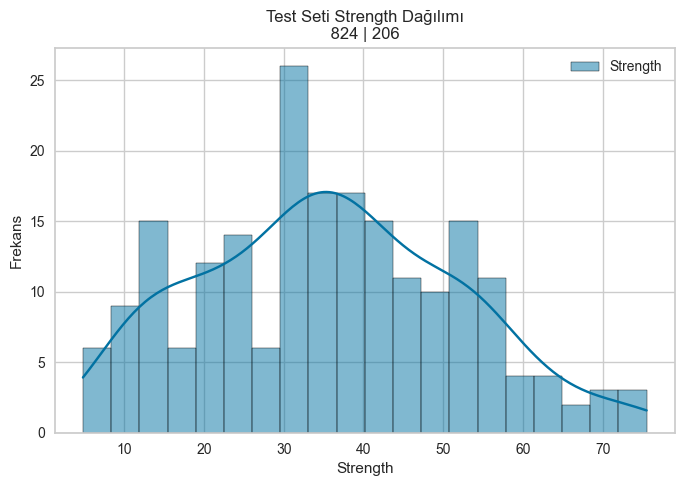

In [96]:
plt.figure(figsize=(8,5))
sns.histplot(y_test, bins=20, kde=True, color="red")
plt.title(f"Test Seti Strength Dağılımı\n {train_size} | {test_size} ", fontsize=12)
plt.xlabel("Strength")
plt.ylabel("Frekans")
plt.show()

In [97]:
pip install --upgrade numpy

Note: you may need to restart the kernel to use updated packages.


In [98]:
pip install --upgrade torch tensorflow

In [99]:
import tensorflow as tf


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.3.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "C:\Users\leyuz\anaconda3\Lib\runpy.py", line 198, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\leyuz\anaconda3\Lib\runpy.py", line 88, in _run_code
    exec(code, run_globals)
  File "C:\Users\leyuz\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\leyuz\anaconda3\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\leyuz\anaconda3\Lib\site-pac

AttributeError: _ARRAY_API not found

In [100]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [101]:
x = df.drop('Strength', axis=1)
y = df['Strength']

In [102]:
model=Sequential()
model.add(Dense(120,activation='relu'))
model.add(Dense(80,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1)) #regressionda burası önemli
model.compile(loss='mean_squared_error', optimizer='adam') #resressionda mean kısmı da önemli

In [103]:
from sklearn.model_selection import train_test_split

In [104]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=.20, random_state=42)

In [105]:
history=model.fit(x_train,y_train, epochs=15, batch_size=15, validation_data=(x_test,y_test), verbose=1)

Epoch 1/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - loss: 504.1187 - val_loss: 174.9391
Epoch 2/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 171.9808 - val_loss: 138.0055
Epoch 3/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 145.2191 - val_loss: 123.2866
Epoch 4/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 116.5086 - val_loss: 84.5798
Epoch 5/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 111.8553 - val_loss: 80.0020
Epoch 6/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 101.6709 - val_loss: 78.1229
Epoch 7/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 103.5171 - val_loss: 118.0539
Epoch 8/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 81.2668 - val_loss: 62.4942
Epoch 9/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 78.7432 - val_loss: 54.3912
Epoch 10/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 83.0469 - val_loss: 114.4316
Epoch 11/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 75.9351 - val_loss: 51.0641
Epoch 12/15
55/55 ━━━━━━━━━━━━━━━━━━━━

In [106]:
tahmin=model.predict(x_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step 


In [107]:
from sklearn.metrics import r2_score, mean_squared_error

In [108]:
r2_score(y_test,tahmin)

0.4973994832108918

In [109]:
mean_squared_error(y_test,tahmin)**.5

11.380274515262217

In [111]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

preds = {
    "DummyMean":    pred_base,        
    "DummyMedian":  pred_base_med,    
    "Linear":       tahmin_lr,        
    "Ridge":        tahminR,     
    "Lasso":        tahminL,     
    "ElasticNet":   tahminE,       
    "DecisionTree": tahmin_dt,        
    "RandomForest": tahmin_rf,        
    "ExtraTrees":   tahmin_et,        
    "DeepLearning": tahmin            
}

rows = []
for name, p in preds.items():
    rows.append({
        "Model": name,
        "R2": r2_score(y_test, p),
        "RMSE": np.sqrt(mean_squared_error(y_test, p)),
        "MAE": mean_absolute_error(y_test, p),
    })

pd.DataFrame(rows).set_index("Model").sort_values("R2", ascending=False)

,R2,RMSE,MAE
Model,,,
ExtraTrees,0.890426,5.313688,3.366524
RandomForest,0.873555,5.708102,3.846084
DecisionTree,0.814848,6.907252,4.405920
ElasticNet,0.627632,9.795513,7.743301
Lasso,0.627577,9.796238,7.743487
Ridge,0.627542,9.796706,7.745389
Linear,0.627542,9.796708,7.745393
DeepLearning,0.497399,11.380275,8.988819
DummyMean,-0.000154,16.053687,13.052409


## Classification

In [112]:
def green_classifier(s):
    if (s.Slag + s.FlyAsh < 150.0) and (s.Plasticizer < 10.0):
        return "n/a"
    else:
        return "green"

In [113]:
df["Green"] = df.apply(green_classifier, axis=1)

In [114]:
def strength_classifier(x):
    if x < 17.0:
        return "non-structural"
    elif x < 28.0:
        return "residential"
    elif x < 70.0:
        return "commercial"
    else:
        return "high-strength"

In [115]:
df["ConcreteClass"] = df.Strength.apply(strength_classifier)

In [116]:
df["Plasticizer"] = df["Plasticizer"].apply(lambda x: "yes" if x > 0 else "no")

In [117]:
df.drop("Strength", axis=1, inplace=True)

In [118]:
df.isna().sum()

Cement           0
Slag             0
FlyAsh           0
Water            0
Plasticizer      0
CoarseAgg        0
FineAgg          0
Age              0
Green            0
ConcreteClass    0
dtype: int64

In [119]:
df.head()

,Cement,Slag,FlyAsh,Water,Plasticizer,CoarseAgg,FineAgg,Age,Green,ConcreteClass
0,540.0,0.0,0.0,162.0,yes,1040.0,676.0,28,n/a,high-strength
1,540.0,0.0,0.0,162.0,yes,1055.0,676.0,28,n/a,commercial
2,332.5,142.5,0.0,228.0,no,932.0,594.0,270,n/a,commercial
3,332.5,142.5,0.0,228.0,no,932.0,594.0,365,n/a,commercial
4,198.6,132.4,0.0,192.0,no,978.4,825.5,360,n/a,commercial


In [120]:
x = df.drop("ConcreteClass", axis=1)

In [121]:
y = df["ConcreteClass"]

In [122]:
from sklearn.model_selection import train_test_split

In [123]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [124]:
from sklearn.preprocessing import MinMaxScaler

In [125]:
num_cols = ["Cement","Slag","FlyAsh","Water","CoarseAgg","FineAgg","Age"]

In [126]:
scaler = MinMaxScaler()

In [127]:
x_train[num_cols] = scaler.fit_transform(x_train[num_cols])

In [128]:
x_test[num_cols] = scaler.transform(x_test[num_cols])

In [129]:
x_train = pd.get_dummies(x_train, columns=["Plasticizer","Green"], drop_first=False)
x_test  = pd.get_dummies(x_test,  columns=["Plasticizer","Green"], drop_first=False)

In [130]:
x_train, x_test = x_train.align(x_test, join="left", axis=1, fill_value=0)

In [131]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, f1_score

In [132]:
B = DummyClassifier(strategy="most_frequent")

In [133]:
B.fit(x_train, y_train)

DummyClassifier(strategy='most_frequent')

In [134]:
Btahmin = B.predict(x_test)

In [135]:
accuracy_score(y_test, Btahmin)

0.616504854368932

In [136]:
f1_score(y_test, Btahmin, average="macro")

0.1906906906906907

In [137]:
from sklearn.metrics import f1_score

In [138]:
from sklearn.linear_model import LogisticRegression

In [139]:
L = LogisticRegression()

In [140]:
L.fit(x_train, y_train)

LogisticRegression()

In [141]:
Ltahmin = L.predict(x_test)

In [142]:
accuracy_score(y_test, Ltahmin)

0.6990291262135923

In [143]:
f1_score(y_test, Ltahmin, average="macro")

0.3947964786890962

In [144]:
from sklearn.neighbors import KNeighborsClassifier

In [145]:
K = KNeighborsClassifier()

In [146]:
K.fit(x_train, y_train)

KNeighborsClassifier()

In [147]:
Ktahmin = K.predict(x_test)

In [148]:
accuracy_score(y_test, Ktahmin)

0.7087378640776699

In [149]:
f1_score(y_test, Ktahmin, average="macro")

0.595270231866015

In [150]:
from sklearn.tree import DecisionTreeClassifier

In [151]:
D = DecisionTreeClassifier()

In [152]:
D.fit(x_train, y_train)

DecisionTreeClassifier()

In [153]:
Dtahmin = D.predict(x_test)

In [154]:
accuracy_score(y_test, Dtahmin)

0.8300970873786407

In [155]:
f1_score(y_test, Dtahmin, average="macro")

0.7494328787432236

In [156]:
from sklearn.ensemble import RandomForestClassifier

In [157]:
R = RandomForestClassifier()

In [158]:
R.fit(x_train, y_train)

RandomForestClassifier()

In [159]:
Rtahmin = R.predict(x_test)

In [160]:
accuracy_score(y_test, Rtahmin)

0.8689320388349514

In [161]:
f1_score(y_test, Rtahmin, average="macro")

0.7934590173976966

In [162]:
from sklearn.ensemble import GradientBoostingClassifier

In [163]:
G = GradientBoostingClassifier()

In [164]:
G.fit(x_train, y_train)

GradientBoostingClassifier()

In [165]:
Gtahmin = G.predict(x_test)

In [166]:
accuracy_score(y_test, Gtahmin)

0.8543689320388349

In [167]:
f1_score(y_test, Gtahmin, average="macro")

0.767749069789933

In [168]:
from sklearn.naive_bayes import GaussianNB

In [169]:
NB = GaussianNB()

In [170]:
NB.fit(x_train, y_train)

GaussianNB()

In [171]:
NBtahmin = NB.predict(x_test)

In [172]:
accuracy_score(y_test, NBtahmin)

0.6116504854368932

In [173]:
f1_score(y_test, NBtahmin, average="macro")

0.5026286754719272

In [174]:
from sklearn.naive_bayes import BernoulliNB

In [175]:
BNB = BernoulliNB()

In [176]:
BNB.fit(x_train, y_train)

BernoulliNB()

In [177]:
BNBtahmin = BNB.predict(x_test)

In [178]:
accuracy_score(y_test, BNBtahmin)

0.5533980582524272

In [179]:
f1_score(y_test, BNBtahmin, average="macro")

0.28086142993782875

In [180]:
import tensorflow as tf

In [181]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [182]:
le = LabelEncoder()

In [183]:
y_train_enc = le.fit_transform(y_train)
y_test_enc  = le.transform(y_test)

In [184]:
model = Sequential()
model.add(Dense(80, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dense(120, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(4, activation='relu'))  # bu katmana gerek yok, sadeleştirebilirsin
model.add(Dense(len(le.classes_), activation='softmax'))  # çıkış katmanı
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

C:\Users\leyuz\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [185]:
history = model.fit(x_train, y_train_enc, epochs=30, batch_size=32, validation_split=0.1, verbose=1)

Epoch 1/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - accuracy: 0.4939 - loss: 1.3484 - val_accuracy: 0.5904 - val_loss: 1.2296
Epoch 2/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6167 - loss: 1.0985 - val_accuracy: 0.5904 - val_loss: 1.0478
Epoch 3/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6167 - loss: 0.9872 - val_accuracy: 0.5904 - val_loss: 1.0014
Epoch 4/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6518 - loss: 0.8864 - val_accuracy: 0.6506 - val_loss: 0.8644
Epoch 5/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6815 - loss: 0.8025 - val_accuracy: 0.6265 - val_loss: 0.8578
Epoch 6/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7112 - loss: 0.7472 - val_accuracy: 0.6627 - val_loss: 0.7924
Epoch 7/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6991 - loss: 0.7184 - val_accuracy: 0.6506 - val_loss: 0.8164
Epoch 8/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7126 - loss: 0.6972 - val_accuracy: 0.6988 - v

In [186]:
history.history['accuracy']

[0.49392712116241455,
 0.6167341470718384,
 0.6167341470718384,
 0.6518218517303467,
 0.6815114617347717,
 0.7112010717391968,
 0.6990553140640259,
 0.7125505805015564,
 0.7300944924354553,
 0.7462887763977051,
 0.758434534072876,
 0.76113361120224,
 0.7435897588729858,
 0.7705802917480469,
 0.7948718070983887,
 0.7921727299690247,
 0.7867746353149414,
 0.8151147365570068,
 0.7800269722938538,
 0.8218623399734497,
 0.790823221206665,
 0.76113361120224,
 0.8083670735359192,
 0.7989203929901123,
 0.8164642453193665,
 0.8164642453193665,
 0.8110661506652832,
 0.7894737124443054,
 0.8164642453193665,
 0.7867746353149414]

In [189]:
y_pred_probs = model.predict(x_test, verbose=0)  
y_pred_dl = y_pred_probs.argmax(axis=1)  

In [190]:
from sklearn.metrics import accuracy_score

acc = {
    "Baseline":         accuracy_score(y_test, Btahmin),
    "LogReg":           accuracy_score(y_test, Ltahmin),
    "KNN":              accuracy_score(y_test, Ktahmin),
    "DecisionTree":     accuracy_score(y_test, Dtahmin),
    "RandomForest":     accuracy_score(y_test, Rtahmin),
    "GradBoost":        accuracy_score(y_test, Gtahmin),
    "GaussianNB":       accuracy_score(y_test, NBtahmin),
    "BernoulliNB":      accuracy_score(y_test, BNBtahmin),
    "DeepLearning":     accuracy_score(y_test_enc, y_pred_dl),
}
pd.Series(acc).sort_values(ascending=False)



RandomForest    0.868932
GradBoost       0.854369
DecisionTree    0.830097
DeepLearning    0.747573
KNN             0.708738
LogReg          0.699029
Baseline        0.616505
GaussianNB      0.611650
BernoulliNB     0.553398
dtype: float64

In [192]:
from sklearn.metrics import f1_score

f1m = {
    "Baseline":         f1_score(y_test, Btahmin, average="macro"),
    "LogReg":           f1_score(y_test, Ltahmin, average="macro"),
    "KNN":              f1_score(y_test, Ktahmin, average="macro"),
    "DecisionTree":     f1_score(y_test, Dtahmin, average="macro"),
    "RandomForest":     f1_score(y_test, Rtahmin, average="macro"),
    "GradBoost":        f1_score(y_test, Gtahmin, average="macro"),
    "GaussianNB":       f1_score(y_test, NBtahmin, average="macro"),
    "BernoulliNB":      f1_score(y_test, BNBtahmin, average="macro"),
    "DeepLearning":     f1_score(y_test_enc, y_pred_dl, average="macro"),
}
pd.Series(f1m).sort_values(ascending=False)

RandomForest    0.793459
GradBoost       0.767749
DecisionTree    0.749433
KNN             0.595270
GaussianNB      0.502629
DeepLearning    0.471778
LogReg          0.394796
BernoulliNB     0.280861
Baseline        0.190691
dtype: float64